In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from keras.utils.vis_utils import plot_model


##Функции-инструменты

In [ ]:
def metrics_of_quality(y_true, y_pred):
  ac_sc = "accuracy score: " , accuracy_score(y_true, y_pred)
  rec_sc = "recall score: ", recall_score(y_true, y_pred)
  prec_sc = "precision score: ", precision_score(y_true, y_pred)
  f1_sc = "f1 score: ", f1_score(y_true, y_pred)
  roc_sc = "roc auc score: ", roc_auc_score(y_true, y_pred)
  return [ac_sc, rec_sc, prec_sc, f1_sc, roc_sc]

In [ ]:
def print_metrics(metric):
  for elem in metric:
    print(elem, sep = "\n")

#Task 1
Цель: решить задачу классификации с помощью Keras на своём датасете.

1. Изучите предоставленные материалы. Загрузите и подготовьте данные. ✅
2. Определитесь с архитектурой сети, визуализируйте её. Поэкспериментируйте с сетью: поищите оптимальную архитектуру и  гиперпараметры. Не удаляйте результаты старых экспериментов. Определите качество работы сети. Сравните качество и скорость работы с классическими моделями использованными ранее. ✅
3. Сохраните обученную модель. Добавьте результаты сохранения в папку “keras_models” в корень проекта. ✅

##Предобработка данных

In [ ]:
water_dataframe = pd.read_csv('water_potability_preprocessed_without_anomalies.csv')

In [ ]:
X = water_dataframe.drop(columns = ['Potability']).values
y = water_dataframe['Potability'].values

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, 
                                     test_size=0.3)

##Обучение нейронной сети без особых параметров

In [ ]:
model = Sequential() #простейший тип модели, представляет из себя линейный стек слоёв
#посредством функции add добавляем новый слой в нашу модель
model.add(Dense(units = X.shape[1], input_dim=X.shape[1], activation='relu')) # во входном слое столько же нейронов, сколько признаков у объекта
#также указываем функцию активации, иначе по умолчанию будет выбрана линейная функция a(x) = x
model.add(Dense(units = 17, activation='softmax'))
model.add(Dense(units = 14, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy']) #при использовании sgd падает
for i in range(1):
  model.fit(X_train, y_train, epochs=55, batch_size=40) 

Epoch 1/55
53/53 [==============================] - 1s 4ms/step - loss: 0.6772 - accuracy: 0.3758
Epoch 2/55
53/53 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.3758
Epoch 3/55
53/53 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.3758
Epoch 4/55
53/53 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.3758
Epoch 5/55
53/53 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.3758
Epoch 6/55
53/53 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.3758
Epoch 7/55
53/53 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.3758
Epoch 8/55
53/53 [==============================] - 0s 5ms/step - loss: 0.6589 - accuracy: 0.3758
Epoch 9/55
53/53 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.3758
Epoch 10/55
53/53 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.3758
Epoch 11/55
53/53 [

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_test, batch_size=58)

In [ ]:
y_pred = (y_pred > 0.5).astype("int32") #можно было бы выбрать 2 нейрона в выходном слое, но тогда бы пришлось перекодировать y_train и y_test

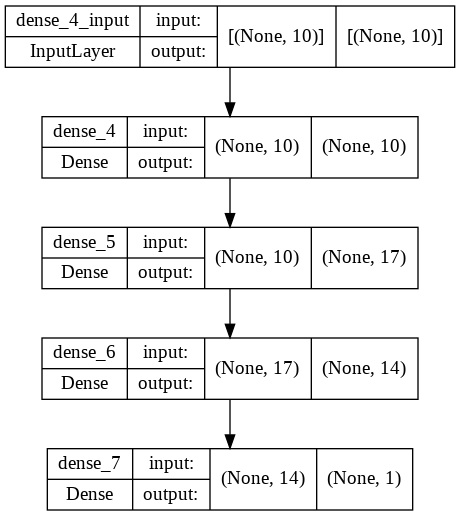

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #визуализация построенной модели

In [ ]:
print_metrics(metrics_of_quality(y_test, y_pred))

('accuracy score: ', 0.668903803131991)
('recall score: ', 0.4657142857142857)
('precision score: ', 0.5992647058823529)
('f1 score: ', 0.5241157556270096)
('roc auc score: ', 0.6326733193277311)


In [ ]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


##Обучение нейросети с подбором гиперпараметров

###Нейросеть 1. Функция softmax, sigmoid, relu; adam optimizer; epochs = 75, batch_size = 30, loss_func = cat_crossentrp

In [ ]:
model = Sequential() 
model.add(Dense(units = X.shape[1], input_dim=X.shape[1], activation='relu'))
model.add(Dense(units = 12, activation='sigmoid')) 
model.add(Dense(units = 10, activation='sigmoid'))
model.add(Dense(units = 14, activation='softmax'))
model.add(Dense(units = 8, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=75, batch_size=30)

In [ ]:
y_pred = model.predict(X_test, batch_size=58)

In [ ]:
y_pred = (y_pred > 0.5).astype("int32") 

In [ ]:
y_pred #при использовании функции softmax хотя бы в одном слое следует неизбежное падение качества работы модели. Всем объектам присуждается один и тот же класс


In [ ]:
print_metrics(metrics_of_quality(y_test, y_pred))

('accuracy score: ', 0.6241610738255033)
('recall score: ', 0.0)
('precision score: ', 0.0)
('f1 score: ', 0.0)
('roc auc score: ', 0.5)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #визуализация построенной модели

###Нейросеть 2. Функция a(x) = x, sigmoid, relu; adam optimizer; epochs = 305, batch_size = 93, loss_func = poisson
Poisson func: 
Computes the Poisson loss between y_true and y_pred.
The Poisson loss is the mean of the elements of the Tensor y_pred - y_true * log(y_pred).

In [ ]:
model = Sequential() 
model.add(Dense(units = X.shape[1], input_dim=X.shape[1], activation='relu'))
model.add(Dense(units = 14, activation='sigmoid')) 
model.add(Dense(units = 10, activation='sigmoid'))
model.add(Dense(units = 7))
model.add(Dense(units = 4, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
model.compile(loss='poisson', optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=305, batch_size=93)

Epoch 1/305
23/23 [==============================] - 1s 6ms/step - loss: 0.8142 - accuracy: 0.3883
Epoch 2/305
23/23 [==============================] - 0s 7ms/step - loss: 0.7937 - accuracy: 0.3883
Epoch 3/305
23/23 [==============================] - 0s 9ms/step - loss: 0.7792 - accuracy: 0.3883
Epoch 4/305
23/23 [==============================] - 0s 10ms/step - loss: 0.7705 - accuracy: 0.4650
Epoch 5/305
23/23 [==============================] - 0s 8ms/step - loss: 0.7652 - accuracy: 0.6117
Epoch 6/305
23/23 [==============================] - 0s 4ms/step - loss: 0.7617 - accuracy: 0.6117
Epoch 7/305
23/23 [==============================] - 0s 2ms/step - loss: 0.7596 - accuracy: 0.6117
Epoch 8/305
23/23 [==============================] - 0s 2ms/step - loss: 0.7582 - accuracy: 0.6117
Epoch 9/305
23/23 [==============================] - 0s 2ms/step - loss: 0.7573 - accuracy: 0.6117
Epoch 10/305
23/23 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.6117
Epoch 11

In [ ]:
y_pred = model.predict(X_test, batch_size=58)

In [ ]:
y_pred = (y_pred > 0.5).astype("int32") 

In [ ]:
print_metrics(metrics_of_quality(y_test, y_pred))

('accuracy score: ', 0.6677852348993288)
('recall score: ', 0.5357142857142857)
('precision score: ', 0.5607476635514018)
('f1 score: ', 0.547945205479452)
('roc auc score: ', 0.6415130568356374)


In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #визуализация построенной модели

###Нейросеть 3. Функция softmax, sigmoid, relu; optimizer = adam; epochs = 185, batch_size = 70, loss_func = binary_crossentropy


In [ ]:
model = Sequential() 
model.add(Dense(units = X.shape[1], input_dim=X.shape[1], activation='relu'))
model.add(Dense(units = 18, activation='sigmoid')) 
model.add(Dense(units = 16, activation='softmax'))
model.add(Dense(units = 14, activation='sigmoid'))
model.add(Dense(units = 12, activation='softmax'))
model.add(Dense(units = 8, activation='sigmoid'))
model.add(Dense(units = 4, activation='softmax'))
model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=185, batch_size=70)

Epoch 1/185
30/30 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4851
Epoch 2/185
30/30 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.6117
Epoch 3/185
30/30 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6117
Epoch 4/185
30/30 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.6117
Epoch 5/185
30/30 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6117
Epoch 6/185
30/30 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6117
Epoch 7/185
30/30 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6117
Epoch 8/185
30/30 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6117
Epoch 9/185
30/30 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6117
Epoch 10/185
30/30 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.6117
Epoch 11/

In [ ]:
y_pred = model.predict(X_test, batch_size=58)

In [ ]:
y_pred = (y_pred > 0.5).astype("int32") 

In [ ]:
print_metrics(metrics_of_quality(y_test, y_pred)) #recall впервые больше, чем 0.4

('accuracy score: ', 0.6375838926174496)
('recall score: ', 0.5773809523809523)
('precision score: ', 0.5159574468085106)
('f1 score: ', 0.5449438202247191)
('roc auc score: ', 0.6256080389144905)


In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #визуализация построенной модели

Сравнение с методами классификации, использованными ранее:

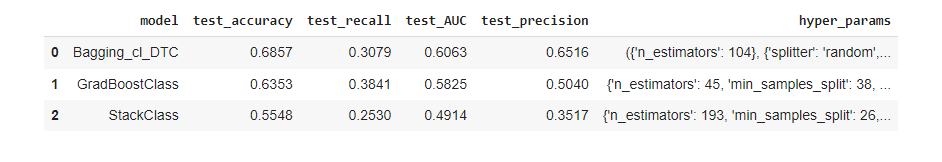